# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
import api_keys
import json
import requests
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
from api_keys import weather_api_key, g_key
import pandas as pd

# importing citipy to look up nearest coordinates to a soon to be created random list of coords.
from citipy import citipy
data_output = ('Output/city_weather_data.csv')

## Generate Cities List

In [5]:
cords = []
city_list = []


# Creating lists for coordinates, keeping separate to keep list of cities the same
lat = np.random.uniform(low=-90.000, high=90.000, size=2000)
lng = np.random.uniform(low=-180.000, high=180.000, size=2000)

#combines above numbers together in cords, creates a coordinate list
cords = zip(lat,lng)

# Finding nearest city with each lat/lng combo
for cord in cords:
    city = citipy.nearest_city(cord[0], cord[1]).city_name
    # Adds only unique cities to city_list
    if city not in city_list:
        city_list.append(city)
# Setting this for a progress bar later on
num_cities = len(city_list)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# Creating lists to store api request info in
lat = []
lng = []
temp_high = []
temp_low = []
feels_like = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
city_id = []

#Creating base url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#Setting units, change this to get different units
units = 'imperial'
# Query URL
cord_query_url = f"{url}&units={units}&appid={weather_api_key}&q="



# Getting data and appending to list, will run in a for loop
# enumerate will keep count of city list count and iterate through city_list
for count, place in enumerate(city_list, start=1):
    try:
        print(f'Working on getting data for "{place.title()}"". This is city #: {count} of {num_cities}')
        weather_response = requests.get(cord_query_url + place).json()
        # appends lists above with information from .get()
        lat.append(weather_response["coord"]['lat'])
        lng.append(weather_response["coord"]["lon"])
        temp_high.append(weather_response["main"]["temp_max"])
        temp_low.append(weather_response["main"]["temp_min"])
        feels_like.append(weather_response["main"]["feels_like"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        city_id.append(weather_response["sys"]["id"])
    # Throws out any key errors and keeps going, prints statements to let you know it couldnt find city
    except(KeyError):
        print(f'"{place.title()}" Not Found')
        print("---------------")
# Shows how many cities were pulled from total list of cities and updates when finished running
print("-------------------------------------------------------------------------------")
print(f'We were only able to find {len(city_name)} of {num_cities} cities')
print("-------------------------------------------------------------------------------")
print("Data Collection has completed")

Working on getting data for "Omboue"". This is city #: 1 of 751
"Omboue" Not Found
---------------
Working on getting data for "Taolanaro"". This is city #: 2 of 751
"Taolanaro" Not Found
---------------
Working on getting data for "Busselton"". This is city #: 3 of 751
"Busselton" Not Found
---------------
Working on getting data for "Manavalakurichi"". This is city #: 4 of 751
Working on getting data for "Mataura"". This is city #: 5 of 751
Working on getting data for "Upernavik"". This is city #: 6 of 751
"Upernavik" Not Found
---------------
Working on getting data for "Kapaa"". This is city #: 7 of 751
Working on getting data for "Atkinson"". This is city #: 8 of 751
Working on getting data for "Leningradskiy"". This is city #: 9 of 751
"Leningradskiy" Not Found
---------------
Working on getting data for "Nizhneyansk"". This is city #: 10 of 751
"Nizhneyansk" Not Found
---------------
Working on getting data for "Evensk"". This is city #: 11 of 751
"Evensk" Not Found
------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [63]:
# Creating DF with the above API Calls
weather_data = pd.DataFrame({"City": city_name,
                            "Country": country,
                            "Latitude": lat,
                            "Longitude": lng,
                            "Temperature High": temp_high,
                            "Temperature Low": temp_low,
                            "Feels Like Temp.": feels_like,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
})
# Exports file to csv
weather_data.to_csv(data_output)
weather_data['Humidity'] = pd.to_numeric(weather_data['Cloudiness'])
# Displays DF
weather_data.head(15)

,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed
0,Omboué,GA,-1.5746,9.2618,71.24,71.24,72.16,37,37,6.22
1,Busselton,AU,-33.6500,115.3333,56.82,56.82,56.30,84,84,16.02
2,Manavālakurichi,IN,8.1333,77.3000,84.29,84.29,90.45,85,85,17.43
3,Mataura,NZ,-46.1927,168.8643,45.48,45.48,45.48,100,100,1.68
4,Upernavik,GL,72.7868,-56.1549,42.26,42.26,37.42,100,100,7.85
5,Kapaa,US,22.0752,-159.3190,85.98,76.19,78.93,40,40,5.01
6,Atkinson,US,42.8384,-71.1470,74.43,64.00,69.04,1,1,5.99
7,Leningradskiy,RU,69.3833,178.4167,38.16,38.16,31.80,27,27,9.04
8,Evensk,RU,61.9500,159.2333,53.24,53.24,52.16,42,42,8.59
9,Cockburn Town,TC,21.4612,-71.1419,81.72,81.72,88.83,28,28,20.33


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
# Empty list to store all cities with humidity over 100
high_humidity_list = []
high_humidity = []


# Locates any row wih humidity over 100, stores 
high_humidity = weather_data[weather_data["Humidity"] > 100]
high_humidity_list.append(high_humidity)
high_humidity_length = len(high_humidity)

# drops all rows where Humidity is over 100
weather_data.drop(weather_data.loc[weather_data["Humidity"] > 100].index, inplace=True)

# Checks length of humidity list
if high_humidity_length > 0:
    #If more than 0 entries it will print below line
    print(f'There are {high_humidity_length} cities with humidity over 100%')
else:
    #If no entries in high_humidity_length it will print below line
    print("No Cities in this list have humidity above 100%")

high_humidity.head(5)

No Cities in this list have humidity above 100%


,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

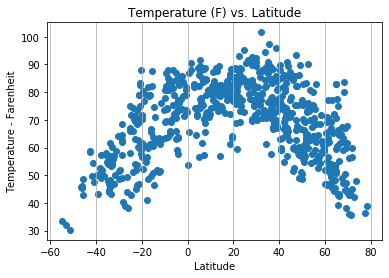

In [65]:
# Creating Scatter plot 
plt.scatter(lat,temp_high)
plt.xlabel("Latitude")
plt.ylabel("Temperature - Farenheit")
plt.grid(axis="x")
plt.title("Temperature (F) vs. Latitude")
plt.savefig("Images/Latitudevstemp.jpg")

This graph shows quite clearley that as you approace the 20 degree latitude mark, your temperature starts to peak. Based on the graph, the further you go on either side from 20 Degrees, you can expect the temperature to drop. There is a running theme in this data set in that the Northern hemisphere, greater than 0 Degrees, has more data. This can be explained by there simply being more land mass and more cities in the northern hemisphere.

## Latitude vs. Humidity Plot

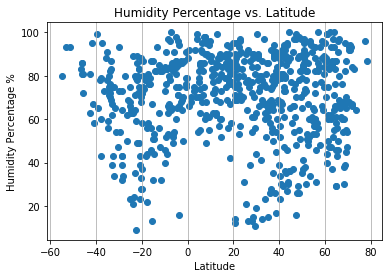

In [66]:
# Creating Scatter plot 
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage %")
plt.grid(axis="x")
plt.title("Humidity Percentage vs. Latitude")
plt.savefig("Output/Humidity.jpg")

If you look at around the equator, you can see there are few data points lower than 40% humidity in relation to other latitudes. The  closer you are to the equator the higher chance you have of there being high humidity. Good ranges are in 20-40 degrees

## Latitude vs. Cloudiness Plot

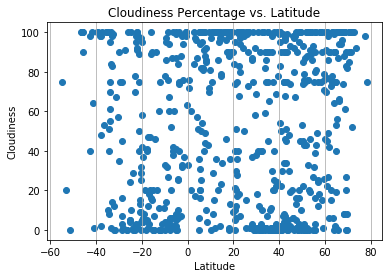

In [67]:
# Creating Scatter plot 
plt.scatter(lat,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(axis="x")
plt.title("Cloudiness Percentage vs. Latitude")
plt.savefig("Images/Latitudevscloudiness.jpg")

Around the Equator there appears to be a higher likelihood of there being high % cloudiness. Between ~ -7 Degrees - 40 Degrees as well as 25-60 Degrees, there is a higher likelihood of having clearer skys.

## Latitude vs. Wind Speed Plot

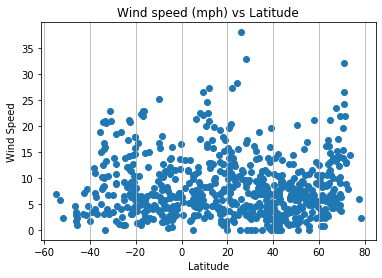

In [68]:
# Creating Scatter plot 
plt.scatter(lat,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(axis="x")
plt.title("Wind speed (mph) vs Latitude")
plt.savefig("Images/Latitudevswindspeed.jpg")

There does not appear to be any observable pattern with the data collected when it pertains to Latitud affecting wind speed. 

## Linear Regression

In [69]:
# Creating DF's for northern and southern hemispheres
northern_hemisphere = weather_data[weather_data["Latitude"] >= 0] 
southern_hemisphere = weather_data[weather_data["Latitude"] < 0] 

In [70]:
lin_eq_list = []

# Creating a function to pass in attributes i.e.(Latitude, windspeed, temp, and others). It then creates a graph and linear regression based on data
def lin_regress(att1,att2):
    print("Beginning calculations")
    pearson = round(st.pearsonr(att1, att2)[0],3)
    print(f"The Pearson r-squared is : {pearson}")
    # Checks pearson coefficient and roughly interprets is, printing results
    if abs(pearson) >= 0 and abs(pearson)<=.30:
        print(f"This graph shows 'negligible' correlation between {att1.name} and {att2.name}")
    elif abs(pearson)>.30 and abs(pearson)<=.5:
        print(f"This graph shows 'low' correlation between {att1.name} and {att2.name}")
    elif abs(pearson)>.50 and abs(pearson)<=.70:
        print(f"This graph shows 'Moderate' correlation between {att1.name} and {att2.name}")    
    elif abs(pearson)>.70 and abs(pearson)<=.90:
        print(f"This graph shows 'High' correlation between {att1.name} and {att2.name}")
    elif abs(pearson)>.90 and abs(pearson)<=.9999:
        print(f"This graph shows 'Very High' correlation between {att1.name} and {att2.name}")
    elif abs(pearson)>= 1:
        print(f"This graph shows 'Perfect' correlation between {att1.name} and {att2.name}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(att1, att2)
    print("Linear regression calculated!")
    regress_values = att1 * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The equation for the line of best fit is: {line_eq}')
    plt.scatter(att1, att2, c=point_color, zorder=1)
    plt.plot(att1,regress_values,line_color, zorder=2)
    lin_eq_list.append(line_eq)
    return line_eq

# Annotates the linear regression from above on the graph, x_values and y
def annotate(line_eq, x_axis, y_axis):
    line_eq
    plt.annotate(line_eq,(x_axis,y_axis),fontsize=font_size,color=equation_color,weight="bold")
    
# Function used to run both functions above and combine variables set, inputs are the two data sets we need to measure ex: Lat vs Temp
def main(att1, att2):
    lin_regress(att1, att2)
    annotate(lin_eq_list[0],x_axis,y_axis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.616
This graph shows 'Moderate' correlation between Latitude and Temperature High
Linear regression calculated!
The equation for the line of best fit is: y = -0.4x + 87.36


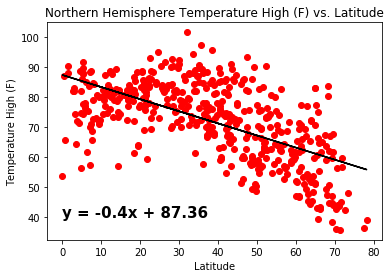

In [71]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 0
y_axis = 40
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter
main(northern_hemisphere["Latitude"],northern_hemisphere["Temperature High"])
plt.title(f'{hemisphere} Hemisphere Temperature High (F) vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Temperature High (F)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Temperature High (F).jpg')

This graph shows only cities in the northern hemisphere and the relationship of Latitude to Temperature highs. This graph shows that generallty speaking, the further north you move away from the equator, the lower the temperature is likely to be. Keep in mind this data set is current weather and will not reflect all seasons.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : 0.715
This graph shows 'High' correlation between Latitude and Temperature High
Linear regression calculated!
The equation for the line of best fit is: y = 0.77x + 79.48


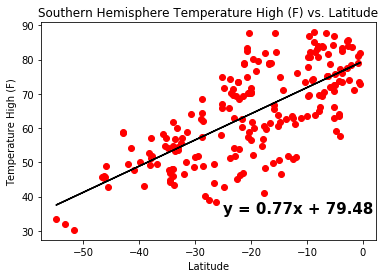

In [72]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -25
y_axis = 35
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Temperature High"])
plt.title(f'{hemisphere} Hemisphere Temperature High (F) vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Temperature High (F)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Temperature High (F).jpg')

This graph shows the Southern hemispheres relationship with Latitude to Temperature highs. There is a clear downwardds trend in temperature as latitude gets further from the Equator. Pearsons coefficient shows High correlation between Latitude and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.012
This graph shows 'negligible' correlation between Latitude and Humidity
Linear regression calculated!
The equation for the line of best fit is: y = -0.02x + 55.36


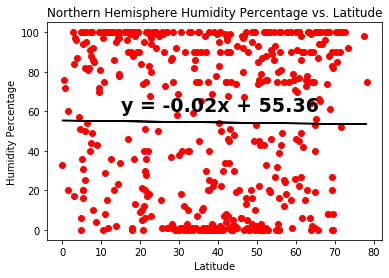

In [74]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 15
y_axis = 60
font_size = 19
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.title(f'{hemisphere} Hemisphere Humidity Percentage vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Humidity Percentage.jpg')

This graph shows the relationship for Northern hemisphere cities as they are affected by Latitude to Humidity Percentage. While the pearson coefficient is low, you can see there is a concentration of low humidity cities in the range of about 25 - 55 degrees latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.146
This graph shows 'negligible' correlation between Latitude and Humidity
Linear regression calculated!
The equation for the line of best fit is: y = -0.45x + 36.77


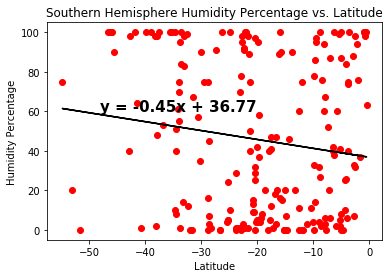

In [77]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -48
y_axis = 60
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.title(f'{hemisphere} Hemisphere Humidity Percentage vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Humidity Percentage.jpg')

This graphs shows the relationship of Latitude to Humidity percentage in the southern hemisphere. There is a negligible correclation found here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.012
This graph shows 'negligible' correlation between Latitude and Cloudiness
Linear regression calculated!
The equation for the line of best fit is: y = -0.02x + 55.36


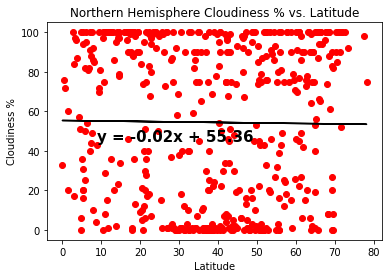

In [78]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 9
y_axis = 45
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.title(f'{hemisphere} Hemisphere Cloudiness % vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Cloudiness %.jpg')

This graph shows the relationship between Latitude and cloudiness percentage. There is a negligible correlation to be found here. Jus tlike with humidity percentage, there appears to be a large amount of low cloud percentage between 25-55 degrees latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.146
This graph shows 'negligible' correlation between Latitude and Cloudiness
Linear regression calculated!
The equation for the line of best fit is: y = -0.45x + 36.77


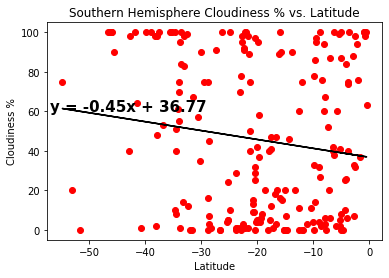

In [79]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -57
y_axis = 60
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.title(f'{hemisphere} Hemisphere Cloudiness % vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Cloudiness %.jpg')

This graph shows the relationship between Cloudiness percentage and Latitude. There is a negligible correlation in this relationship. This graph, like the northern hemisphere above, has the same relationship with humidity.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.035
This graph shows 'negligible' correlation between Latitude and Wind Speed
Linear regression calculated!
The equation for the line of best fit is: y = -0.01x + 8.38


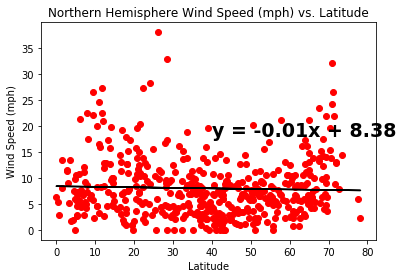

In [80]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = 40
y_axis = 18
font_size = 19
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Northern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.title(f'{hemisphere} Hemisphere Wind Speed (mph) vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Wind Speed (mph).jpg')

This graph shows the relationship between Wind speed and latitude in the Northern Hemisphere. There is a negligible correlation here.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Beginning calculations
The Pearson r-squared is : -0.039
This graph shows 'negligible' correlation between Latitude and Wind Speed
Linear regression calculated!
The equation for the line of best fit is: y = -0.02x + 7.86


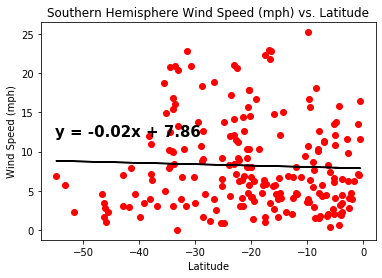

In [81]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -55
y_axis = 12
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.title(f'{hemisphere} Hemisphere Wind Speed (mph) vs. Latitude')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'Images/{hemisphere} Hemisphere - Latitude vs. Wind Speed (mph).jpg')

This graph shows the relationship between Wind speed and latitude in the Southern Hemisphere. There is a negligible correlation here.

Beginning calculations
The Pearson r-squared is : 1.0
This graph shows 'Perfect' correlation between Humidity and Cloudiness
Linear regression calculated!
The equation for the line of best fit is: y = 1.0x + 0.0


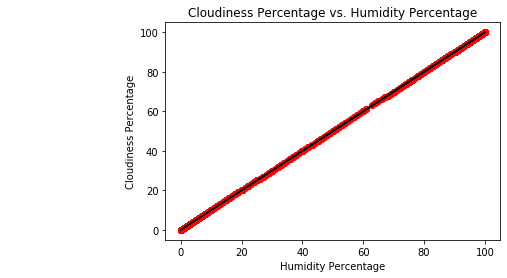

In [88]:
# Set axis values for equation position on graph, font size, and other formatting keys
x_axis = -57
y_axis = 60
font_size = 15
line_color = "black"
equation_color = "black"
point_color = "red"
hemisphere = "Southern"

# Without this the equation is stuck on first graph
lin_eq_list = []

# Uses main function to create scatter plot for
main(weather_data["Humidity"],weather_data["Cloudiness"])
plt.title('Cloudiness Percentage vs. Humidity Percentage')
plt.xlabel("Humidity Percentage")
plt.ylabel("Cloudiness Percentage")
plt.savefig(f'Images/Cloudiness vs. Humidity %.jpg')

This graph shows the relationship between humidity and cloudiness percentage. As you can see, there is a perfect correlation between these two. After further review, it is highly likely that these values are duplicated on data entry. I would expect this relationship to have a high correlation because the more water in the air, the more clouds that can be made.